In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Dataset

### Loading dataset

In [30]:
data = pd.read_csv('brain_stroke.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Dataset dimension

In [31]:
data.shape

(359, 11)

### Dataset description

In [32]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,55.853816,0.200557,0.128134,122.937187,29.808078,0.526462
std,21.690901,0.400976,0.334705,58.079372,6.790263,0.499996
min,0.640000,0.000000,0.000000,55.420000,15.500000,0.000000
25%,43.000000,0.000000,0.000000,78.810000,25.150000,0.000000
50%,59.000000,0.000000,0.000000,97.930000,28.500000,1.000000
75%,75.000000,0.000000,0.000000,174.705000,34.150000,1.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### Visualizing Target

In [33]:
target = data['stroke']

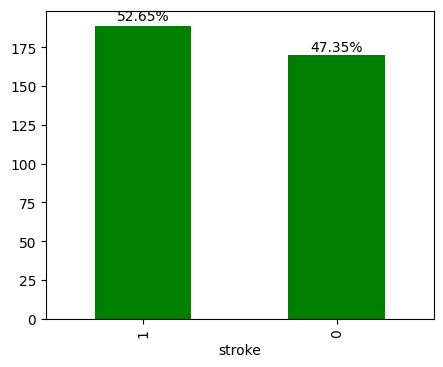

In [34]:
value_counts = target.value_counts()
percentages = []
for count in value_counts:
    percentages.append(round((count / len(target)) * 100, 2)) #Calculating percentages of value_counts of target

value_counts.plot(kind='bar', color='g', figsize=(5, 4))
plt.text(0, 195, str(percentages[0]) + '%', va='center', ha='center')
plt.text(1, 175, str(percentages[1]) + '%', va='center', ha='center')
plt.show()

### Visualizing features/attributes

#### Categorical Data

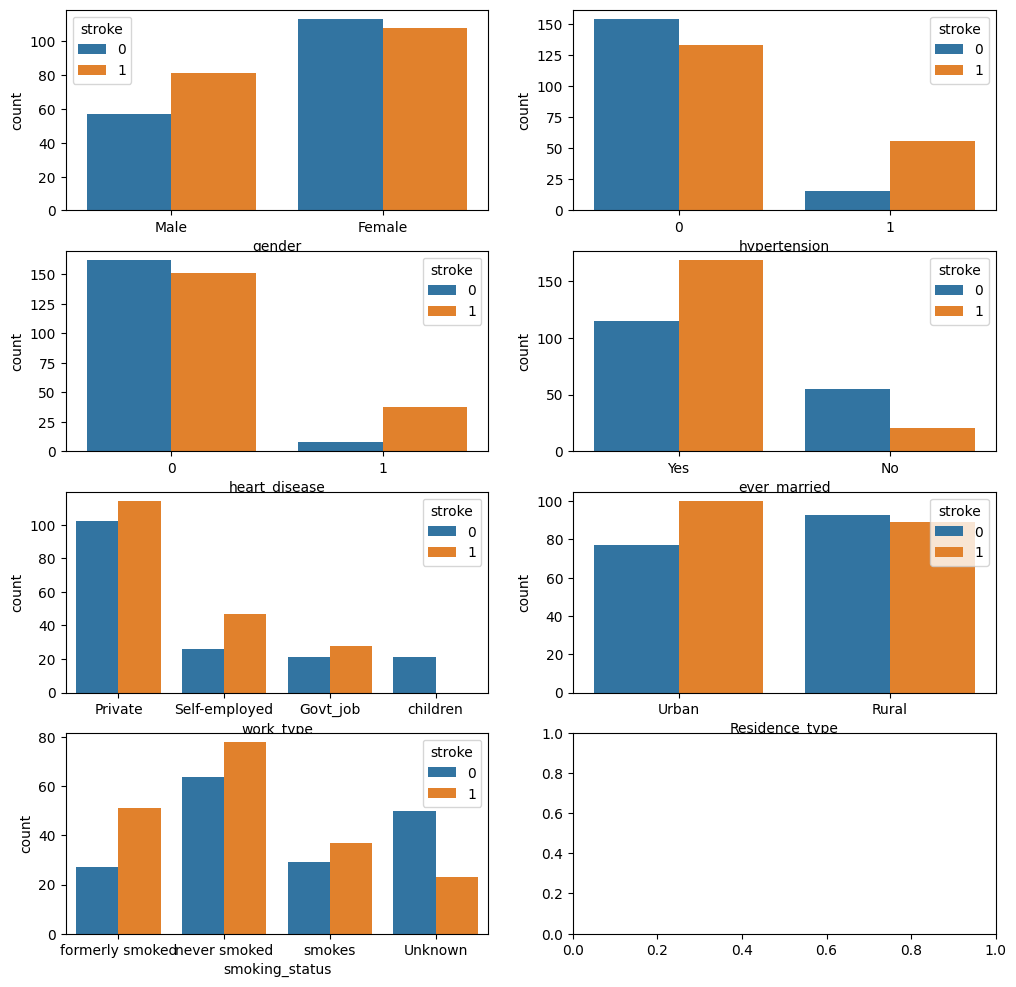

In [35]:
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
            'Residence_type', 'smoking_status']

fig, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.countplot(data, x=cat_cols[0], hue='stroke', ax=axes[0, 0])
sns.countplot(data, x=cat_cols[1], hue='stroke', ax=axes[0, 1])
sns.countplot(data, x=cat_cols[2], hue='stroke', ax=axes[1, 0])
sns.countplot(data, x=cat_cols[3], hue='stroke', ax=axes[1, 1])
sns.countplot(data, x=cat_cols[4], hue='stroke', ax=axes[2, 0])
sns.countplot(data, x=cat_cols[5], hue='stroke', ax=axes[2, 1])
sns.countplot(data, x=cat_cols[6], hue='stroke', ax=axes[3, 0])
# sns.countplot(data, x=cat_cols[7], hue='stroke', ax=axes[3, 1])

plt.show()

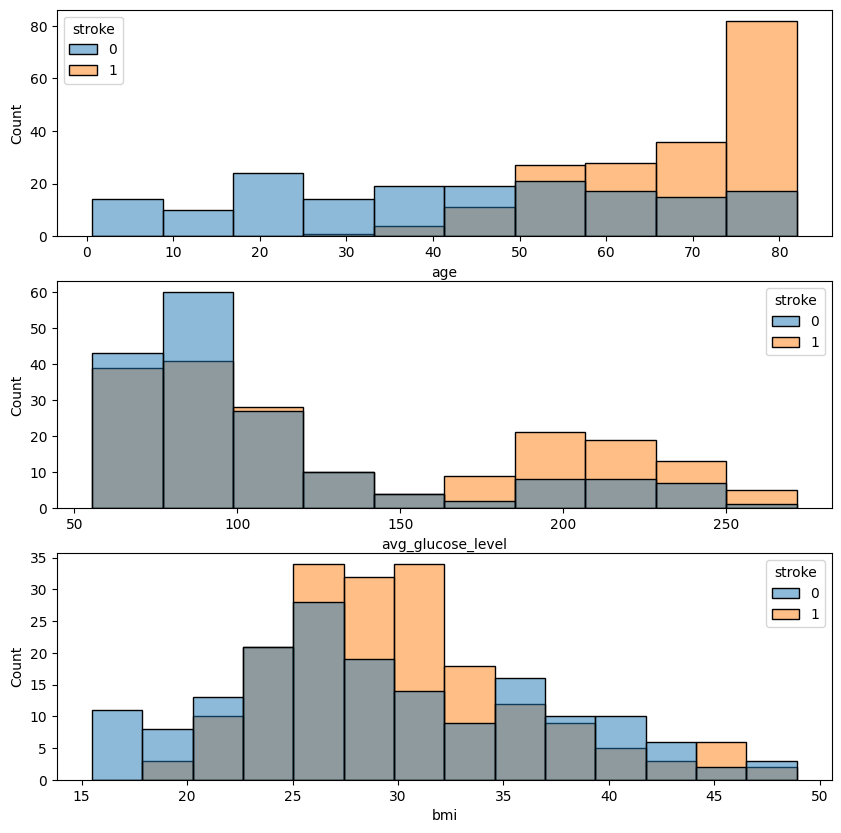

In [36]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
sns.histplot(data, x=num_cols[0], hue='stroke', ax=axes[0], color='r')
sns.histplot(data, x=num_cols[1], hue='stroke', ax=axes[1], color='g')
sns.histplot(data, x=num_cols[2], hue='stroke', ax=axes[2], color='b')
plt.show()

### Checking for null values

In [37]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Detecting outliers (box plot)

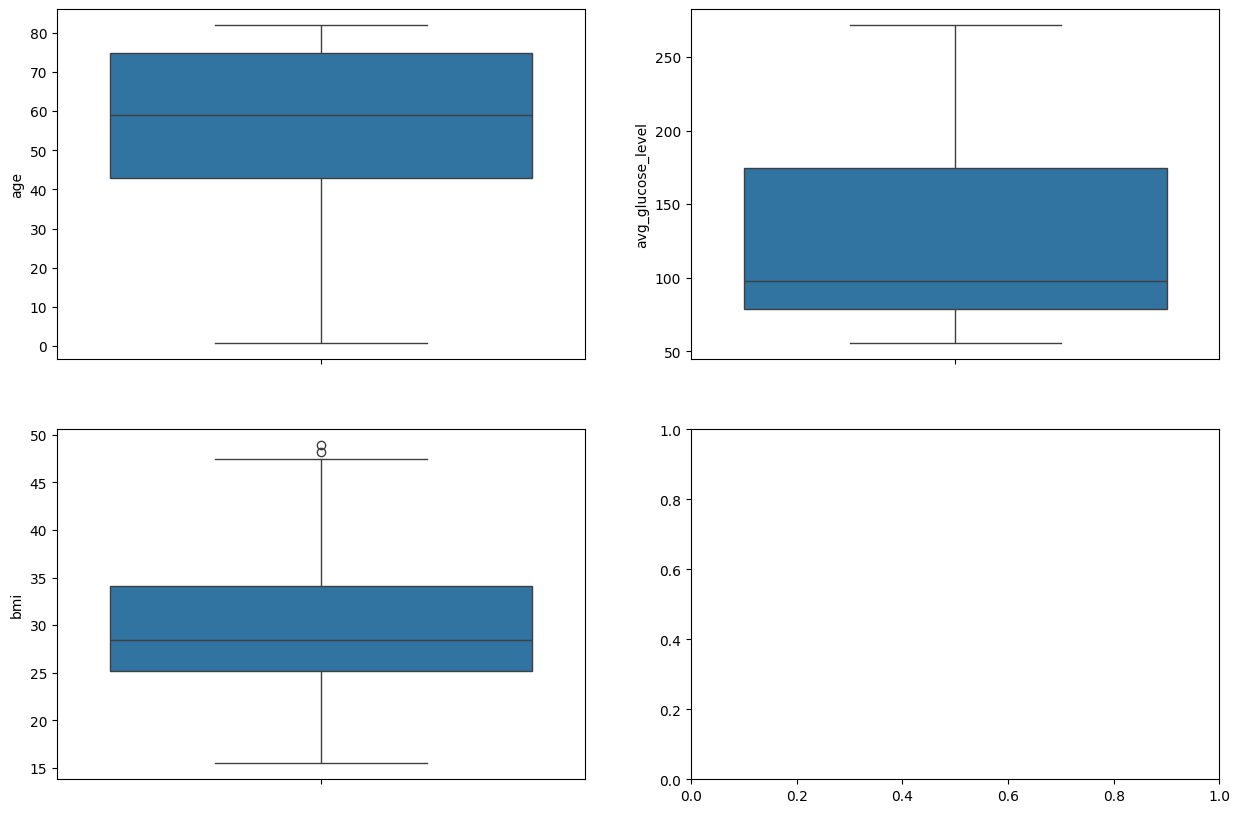

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data, y='age', ax=axes[0, 0])
sns.boxplot(data, y='avg_glucose_level', ax=axes[0, 1])
sns.boxplot(data, y='bmi', ax=axes[1, 0])
plt.show()

### Encoding string value to numerics

In [39]:
def encode(X):
  encoder = LabelEncoder()
  X = encoder.fit_transform(X)
  return X

In [40]:
# data.drop('stroke', axis=1, inplace=True)
data['gender'] = encode(data['gender'])
data['ever_married'] = encode(data['ever_married'])
data['work_type'] = encode(data['work_type'])
data['Residence_type'] = encode(data['Residence_type'])
data['smoking_status'] = encode(data['smoking_status'])

target = encode(target)

In [41]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
5,1,74.0,1,1,1,1,0,70.09,27.4,2,1
6,0,69.0,0,0,0,1,1,94.39,22.8,2,1
7,0,78.0,0,0,1,1,1,58.57,24.2,0,1
8,0,81.0,1,0,1,1,0,80.43,29.7,2,1
9,0,61.0,0,1,1,0,0,120.46,36.8,3,1


### Feature scaling (standardization)

In [42]:
X = data.drop('stroke', axis = 1).to_numpy()
# X = data.to_numpy()
y = pd.to_numeric( data['stroke']).to_numpy()

In [43]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.265484,0.514582,-0.500870,2.608514,0.518219,-0.250176,1.014026,1.823374,1.001640,-0.554159
1,1.265484,1.114748,-0.500870,2.608514,0.518219,-0.250176,-0.986168,-0.293408,0.396992,0.435607
2,-0.790212,-0.316418,-0.500870,-0.383360,0.518219,-0.250176,1.014026,0.832657,0.677195,1.425373
3,-0.790212,1.068581,1.996525,-0.383360,0.518219,1.110630,-0.986168,0.882486,-0.856548,0.435607
4,1.265484,1.160914,-0.500870,-0.383360,0.518219,-0.250176,1.014026,1.090940,-0.119171,-0.554159


## Training and Testing Data

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = .20, random_state = 42)

## Models

#### Decision Tree

In [45]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [46]:
y_pred = tree_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred) * 100
dt_f1 = f1_score(y_test, y_pred) * 100
dt_recall = recall_score(y_test, y_pred) * 100
dt_precision = precision_score(y_test, y_pred) * 100


In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("F1-Score:", f1_score(y_test, y_pred) * 100)
print("Recall:", recall_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred) * 100)


Accuracy: 81.94444444444444
F1-Score: 83.54430379746836
Recall: 86.8421052631579
Precision: 80.48780487804879


#### KNN

In [48]:
from collections import Counter

def Euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x2 - x1) ** 2))

def knn_classifier(X_train, y_train, X_test, k):

    label = []
    for test_point in X_test:
        distance = []
        for train_point in X_train:
            dist = Euclidean_distance(test_point, train_point)
            distance.append(dist)
        nearest_index = np.argsort(np.array(distance))[0:k]
        nearest_label = y_train[nearest_index]
        common_label = Counter(nearest_label).most_common(1)[0][0]    
        label.append(common_label) 
    return np.array(label)

In [49]:
y_pred = knn_classifier(X_train, y_train, X_test, k=3)
# knn.fit(X_train,y_train)

# y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("F1-Score:", f1_score(y_test, y_pred) * 100)
print("Recall:", recall_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred) * 100)


Accuracy: 73.61111111111111
F1-Score: 77.10843373493977
Recall: 84.21052631578947
Precision: 71.11111111111111


#### SVM

In [50]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
svm = SVC(kernel='rbf')
svm.fit(X_train , y_train)

y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("F1-Score:", f1_score(y_test, y_pred) * 100)
print("Recall:", recall_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred) * 100)

Accuracy: 77.77777777777779
F1-Score: 80.48780487804879
Recall: 86.8421052631579
Precision: 75.0


#### Logistic Regression

In [51]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)
accuracy_score(y_test,y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("F1-Score:", f1_score(y_test, y_pred) * 100)
print("Recall:", recall_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred) * 100)

Accuracy: 80.55555555555556
F1-Score: 82.92682926829268
Recall: 89.47368421052632
Precision: 77.27272727272727


### Performance Comparison

#### Recall

C:\Users\alish\AppData\Local\Temp\ipykernel_22256\2742241788.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = recall , x = "Model" , y = "recall" ,palette="husl")


<Axes: xlabel='Model', ylabel='recall'>

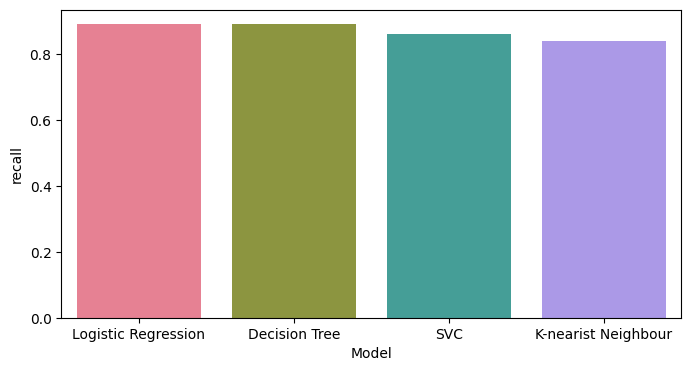

In [52]:
recall = {"Model" :["Logistic Regression", "Decision Tree" , "SVC", "K-nearist Neighbour"],
               "recall" : [0.89, 0.89 ,0.86 ,0.84]}

recall = pd.DataFrame(recall)

plt.figure(figsize=(8,4))
sns.barplot(data = recall , x = "Model" , y = "recall" ,palette="husl")

#### F1 Score

C:\Users\alish\AppData\Local\Temp\ipykernel_22256\3613877809.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = f1score , x = "Model" , y = "f1score" ,palette="muted")


<Axes: xlabel='Model', ylabel='f1score'>

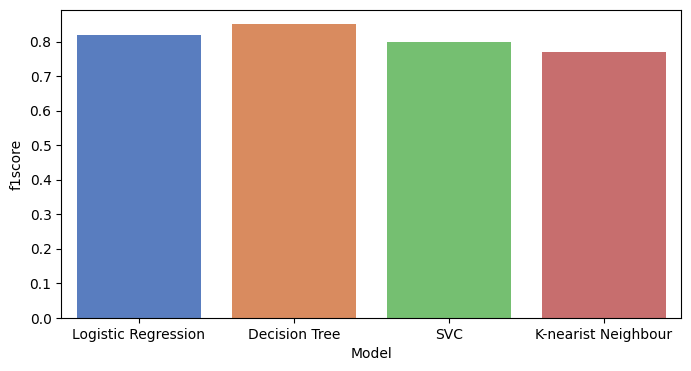

In [53]:
f1score = {"Model" :["Logistic Regression", "Decision Tree" , "SVC", "K-nearist Neighbour"],
               "f1score" : [0.82, 0.85 ,0.80 ,0.77]}

f1score = pd.DataFrame(f1score)

plt.figure(figsize=(8,4))
sns.barplot(data = f1score , x = "Model" , y = "f1score" ,palette="muted")

#### Precision

C:\Users\alish\AppData\Local\Temp\ipykernel_22256\3555956917.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = precision , x = "Model" , y = "precision" ,palette="coolwarm")


<Axes: xlabel='Model', ylabel='precision'>

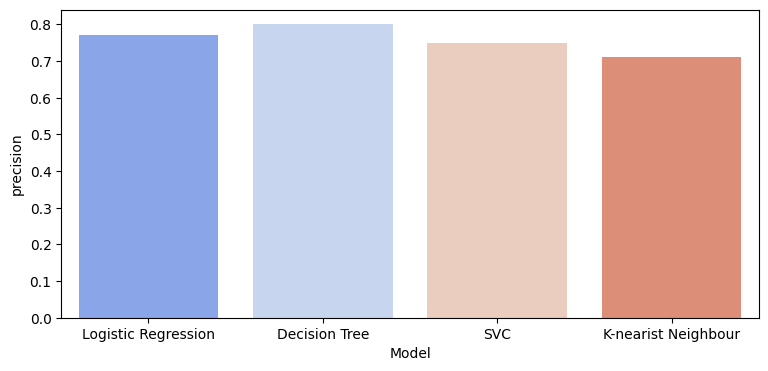

In [54]:
precision = {"Model" :["Logistic Regression", "Decision Tree" , "SVC", "K-nearist Neighbour"],
               "precision" : [0.77, 0.80 ,0.75 ,0.71]}

precision = pd.DataFrame(precision)

plt.figure(figsize=(9,4))
sns.barplot(data = precision , x = "Model" , y = "precision" ,palette="coolwarm")

#### Accuracy

C:\Users\alish\AppData\Local\Temp\ipykernel_22256\2628652461.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = performance , x = "Model" , y = "performance" ,palette="dark:salmon_r")


<Axes: xlabel='Model', ylabel='performance'>

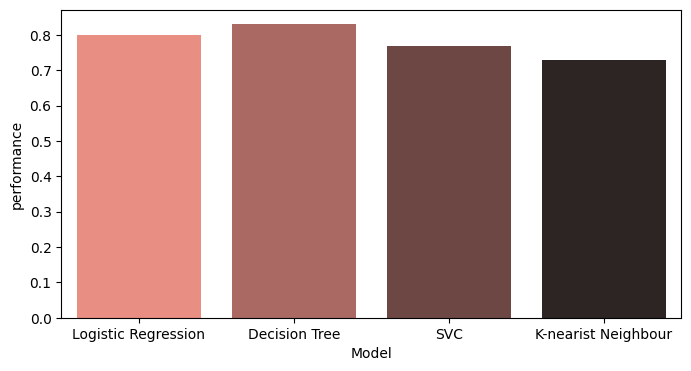

In [58]:
performance = {"Model" :["Logistic Regression", "Decision Tree" , "SVC", "K-nearist Neighbour"],
               "performance" : [0.80  ,0.83 ,0.77 ,0.73]}

performance = pd.DataFrame(performance)

plt.figure(figsize=(8,4))
sns.barplot(data = performance , x = "Model" , y = "performance" ,palette="dark:salmon_r")

GUI

Load and Preprocess the Data

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('brain_stroke.csv')

# Display the first few rows of the dataset
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


 Preprocess the Data and Train an SVM Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Preprocess the data
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Define features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM model
model = SVC(probability=True)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8055555555555556

Create a GUI


In [7]:
import tkinter as tk
from tkinter import ttk
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to predict stroke based on user inputs
def predict_stroke():
    # Get user inputs
    gender = gender_var.get()
    age = float(age_var.get())
    hypertension = int(hypertension_var.get())
    heart_disease = int(heart_disease_var.get())
    ever_married = ever_married_var.get()
    work_type = work_type_var.get()
    Residence_type = Residence_type_var.get()
    avg_glucose_level = float(avg_glucose_level_var.get())
    bmi = float(bmi_var.get())
    smoking_status = smoking_status_var.get()
    
    # Encode categorical variables
    gender_Male = 1 if gender == 'Male' else 0
    ever_married_Yes = 1 if ever_married == 'Yes' else 0
    work_type_Private = 1 if work_type == 'Private' else 0
    work_type_Self_employed = 1 if work_type == 'Self-employed' else 0
    work_type_Govt_job = 1 if work_type == 'Govt_job' else 0
    work_type_Never_worked = 1 if work_type == 'Never_worked' else 0
    Residence_type_Urban = 1 if Residence_type == 'Urban' else 0
    smoking_status_formerly_smoked = 1 if smoking_status == 'formerly smoked' else 0
    smoking_status_never_smoked = 1 if smoking_status == 'never smoked' else 0
    
    # Create input array
    input_data = np.array([[age, hypertension, heart_disease, avg_glucose_level, bmi,
                            gender_Male, ever_married_Yes, work_type_Private, work_type_Self_employed,
                            work_type_Govt_job, work_type_Never_worked, Residence_type_Urban,
                            smoking_status_formerly_smoked, smoking_status_never_smoked]])
    
    # Scale the input data
    input_data = scaler.transform(input_data)
    
    # Predict stroke
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)[0][1]
    
    # Display result
    result_var.set(f"Prediction: {'Stroke' if prediction[0] == 1 else 'No Stroke'}\nProbability: {probability:.2f}")

# Create the main window
root = tk.Tk()
root.title("Stroke Prediction")

# Create input variables
gender_var = tk.StringVar()
age_var = tk.StringVar()
hypertension_var = tk.StringVar()
heart_disease_var = tk.StringVar()
ever_married_var = tk.StringVar()
work_type_var = tk.StringVar()
Residence_type_var = tk.StringVar()
avg_glucose_level_var = tk.StringVar()
bmi_var = tk.StringVar()
smoking_status_var = tk.StringVar()
result_var = tk.StringVar()

# Create and place widgets
ttk.Label(root, text="Gender").grid(column=0, row=0, padx=5, pady=5)
ttk.Combobox(root, textvariable=gender_var, values=["Male", "Female"]).grid(column=1, row=0, padx=5, pady=5)

ttk.Label(root, text="Age").grid(column=0, row=1, padx=5, pady=5)
ttk.Entry(root, textvariable=age_var).grid(column=1, row=1, padx=5, pady=5)

ttk.Label(root, text="Hypertension (0/1)").grid(column=0, row=2, padx=5, pady=5)
ttk.Entry(root, textvariable=hypertension_var).grid(column=1, row=2, padx=5, pady=5)

ttk.Label(root, text="Heart Disease (0/1)").grid(column=0, row=3, padx=5, pady=5)
ttk.Entry(root, textvariable=heart_disease_var).grid(column=1, row=3, padx=5, pady=5)

ttk.Label(root, text="Ever Married").grid(column=0, row=4, padx=5, pady=5)
ttk.Combobox(root, textvariable=ever_married_var, values=["Yes", "No"]).grid(column=1, row=4, padx=5, pady=5)

ttk.Label(root, text="Work Type").grid(column=0, row=5, padx=5, pady=5)
ttk.Combobox(root, textvariable=work_type_var, values=["Private", "Self-employed", "Govt_job", "Children", "Never_worked"]).grid(column=1, row=5, padx=5, pady=5)

ttk.Label(root, text="Residence Type").grid(column=0, row=6, padx=5, pady=5)
ttk.Combobox(root, textvariable=Residence_type_var, values=["Urban", "Rural"]).grid(column=1, row=6, padx=5, pady=5)

ttk.Label(root, text="Average Glucose Level").grid(column=0, row=7, padx=5, pady=5)
ttk.Entry(root, textvariable=avg_glucose_level_var).grid(column=1, row=7, padx=5, pady=5)

ttk.Label(root, text="BMI").grid(column=0, row=8, padx=5, pady=5)
ttk.Entry(root, textvariable=bmi_var).grid(column=1, row=8, padx=5, pady=5)

ttk.Label(root, text="Smoking Status").grid(column=0, row=9, padx=5, pady=5)
ttk.Combobox(root, textvariable=smoking_status_var, values=["formerly smoked", "never smoked", "smokes"]).grid(column=1, row=9, padx=5, pady=5)

ttk.Button(root, text="Predict", command=predict_stroke).grid(column=0, row=10, columnspan=2, padx=5, pady=5)

ttk.Label(root, textvariable=result_var).grid(column=0, row=11, columnspan=2, padx=5, pady=5)

# Start the main event loop
root.mainloop()


C:\Users\alish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
